# Numerical solution to the wave equation in 1D and 2D

<IPython.core.display.Javascript object>


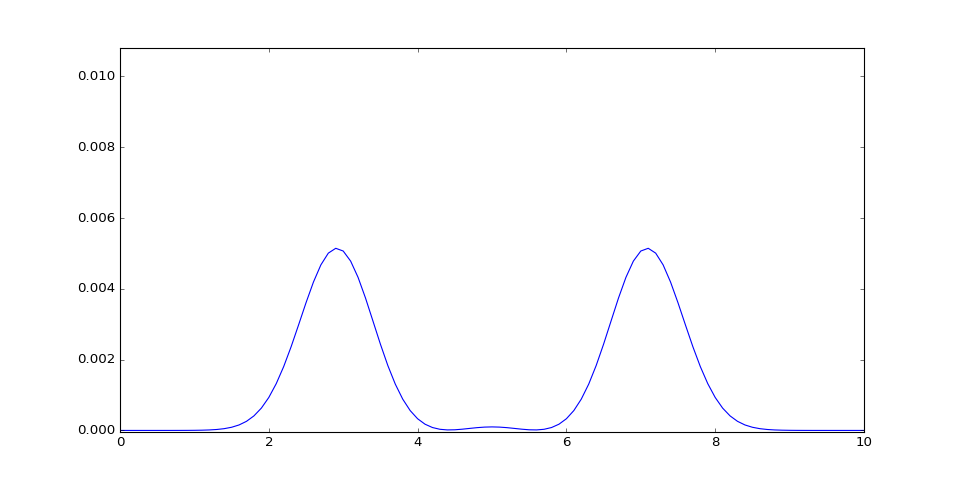

In [10]:
import pycav.pde as pde
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as anim

%matplotlib notebook

def twoD_gaussian(XX,YY,mean,std):
	return np.exp(-((XX-mean[0])**2+(YY-mean[1])**2)/(2*std**2))

def oneD_gaussian(x,mean,std):
	return np.exp(-((x-mean)**2)/(2*std**2))

x = np.linspace(0.,10,101)

psi_0_1d = 0.01*oneD_gaussian(x,5.,0.5)

N = 250

psi_1d,t = pde.explicit_wave_equation(psi_0_1d,0.1,N, bound_cond = 'reflective')

fig1 = plt.figure(figsize = (12,6))
line = plt.plot(x,psi_1d[:,0])[0]
plt.ylim([np.min(psi_1d[:,:]),np.max(psi_1d[:,:])])

def nextframe(arg):
	line.set_data(x,psi_1d[:,arg])

animate = anim.FuncAnimation(fig1,nextframe, frames = N, interval = 150)

<IPython.core.display.Javascript object>


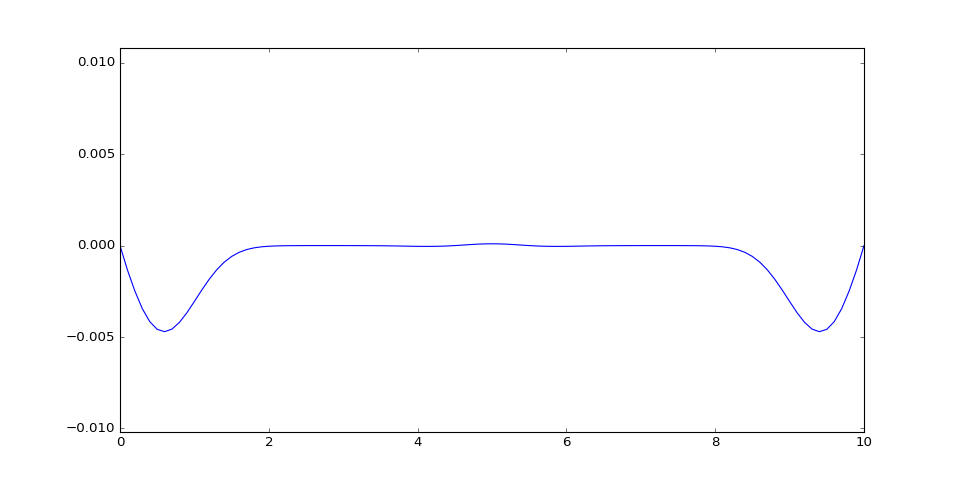

In [12]:
psi_1d,t = pde.explicit_wave_equation(psi_0_1d,0.1,N, bound_cond = 'fixed')

fig2 = plt.figure(figsize = (12,6))
line = plt.plot(x,psi_1d[:,0])[0]
plt.ylim([np.min(psi_1d[:,:]),np.max(psi_1d[:,:])])

def nextframe(arg):
	line.set_data(x,psi_1d[:,arg])

animate = anim.FuncAnimation(fig2,nextframe, interval = 150)

<IPython.core.display.Javascript object>


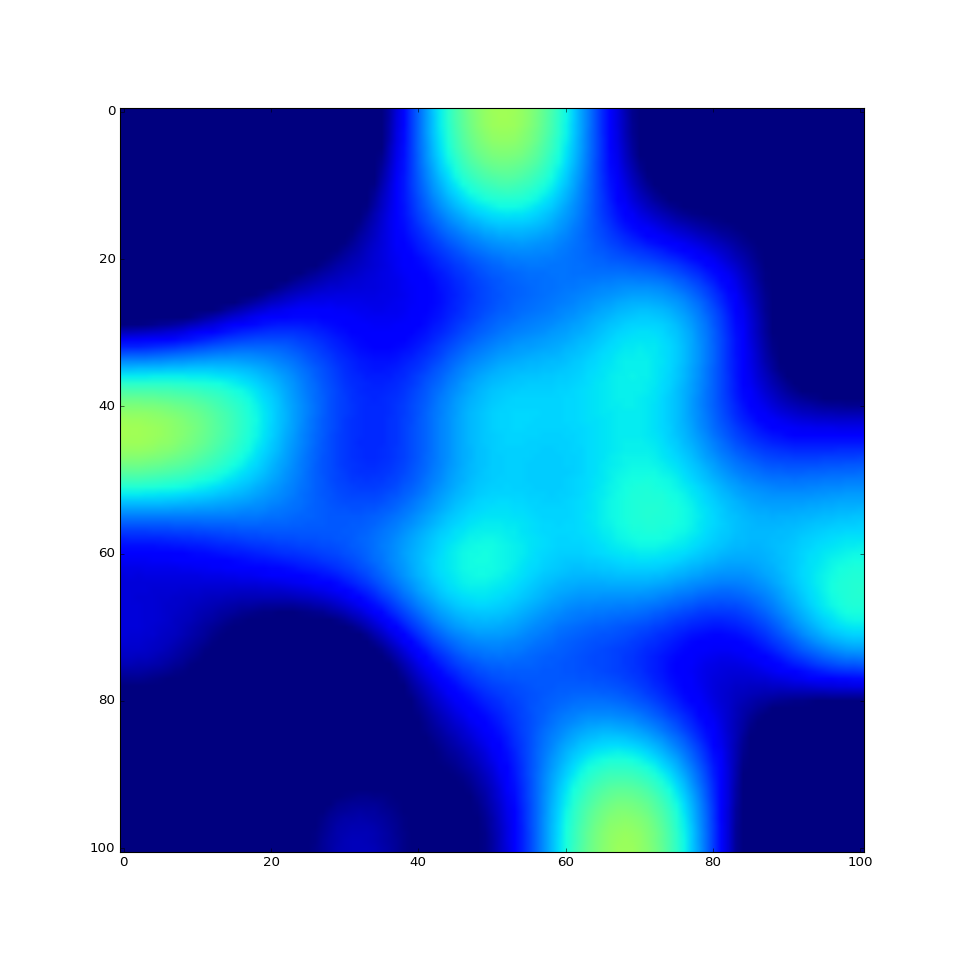

In [16]:
XX,YY = np.meshgrid(x,x)

psi_0_2d = 0.01*twoD_gaussian(XX,YY,[5.,4.],1.0)+0.01*twoD_gaussian(XX,YY,[3.,6.],1.0)

psi_2d,t = pde.explicit_wave_equation(psi_0_2d,0.1,2*N, a = 0.35, bound_cond = 'reflective')

fig3 = plt.figure(figsize = (12,12))
image = plt.imshow(psi_2d[:,:,0])

def nextframe(arg):
	image.set_data(psi_2d[:,:,2*arg])

animate = anim.FuncAnimation(fig3,nextframe, frames = N,interval = 50)